In [ ]:
import pandas as pd
import numpy as np
!pip install mne
import mne

In [ ]:
path = "/content/OpenBCI-RAW-2024-02-15_20-40-47.txt"
df = pd.read_csv(path, delimiter = ',', skiprows=5)
data = df.to_numpy()

In [ ]:
sfreq = 250  # sample rate in Hz
#for focus, multiply the sfreq by the time to get the number of which sample you are on
# records every 1/250 secondsd
#data = np.delete(data, [12, 13, 19, 20, 21, 23], axis=1) # IMPORTANT - CHANGE THIS FOR EVERY DATA READING
data = data[:, :-1] # removes timestamps
#data = data[]
df = pd.DataFrame(data)
ch_names = ['Channel {}'.format(i) for i in range(data.shape[1])]
ch_types = ['eeg' for i in range(data.shape[1])]

In [ ]:
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(data.T, info)

Creating RawArray with float64 data, n_channels=24, n_times=294324
    Range : 0 ... 294323 =      0.000 ...  1177.292 secs
Ready.


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<Info | 7 non-empty values
 bads: []
 ch_names: Channel 1, Channel 2, Channel 3, Channel 4, Channel 5, Channel ...
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>
[[ 1075.5212397   1094.02848411  1061.14906802 ... 12744.49530178
  12715.5944962  12758.35338334]
 [15992.53904731 16009.83929751 16004.60898931 ... 20697.67066213
  20674.93893801 20700.08465053]
 [49998.17013719 50009.30130593 50003.26633492 ... 26003.97479582
  25979.76785657 26011.46263021]
 ...
 [63234.33676175 63245.8255584  63236.88486062 ... 27900.07327796
  27876.26867011 27904.11894371]
 [37434.79102073 37448.0009017  37439.08255566 ... -2755.54540819
  -2781.27226606 -2765.73780367]
 [72583.66913601 72593.1686274  72592.20750239 ... 25339.45743316
  25327.90158128 25364.15611078]]
NOTE: plot_psd() is a legacy function. New code should use .compu

<ipython-input-53-e632e1ec1755>:7: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
<ipython-input-53-e632e1ec1755>:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


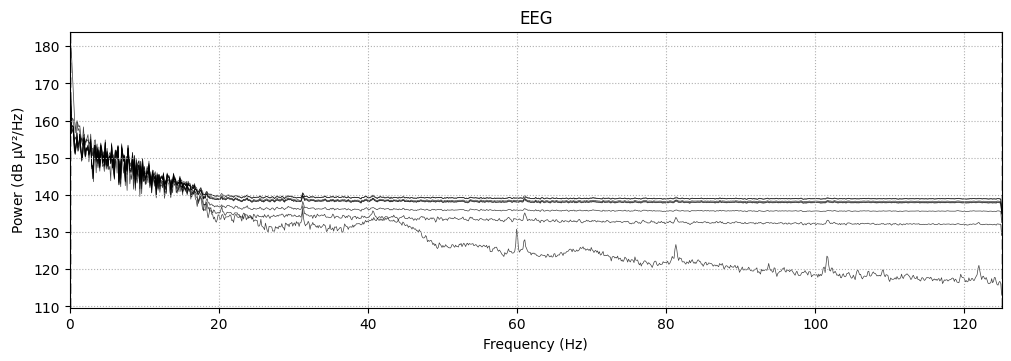

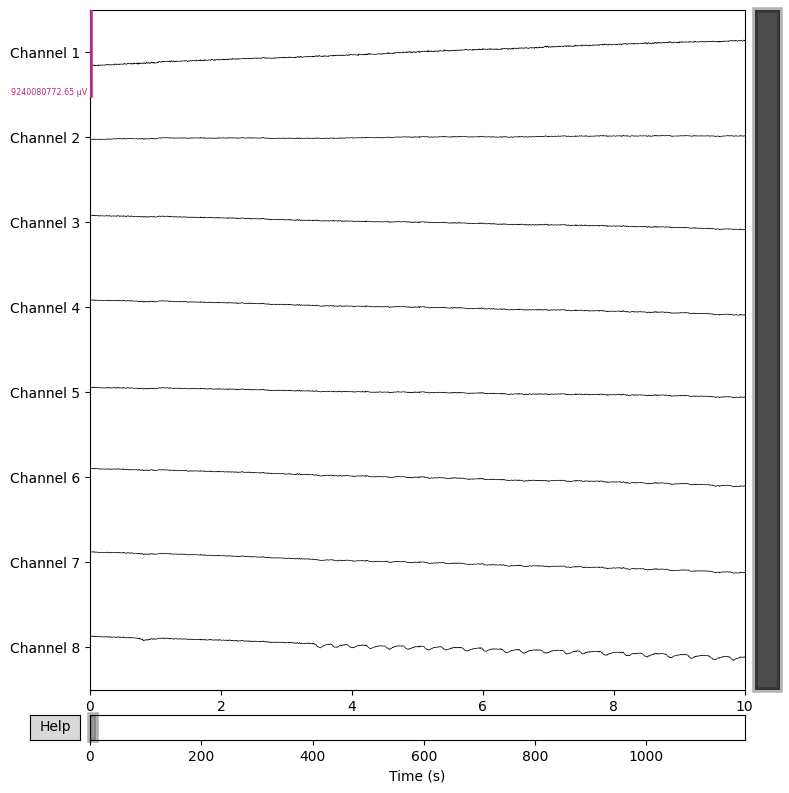

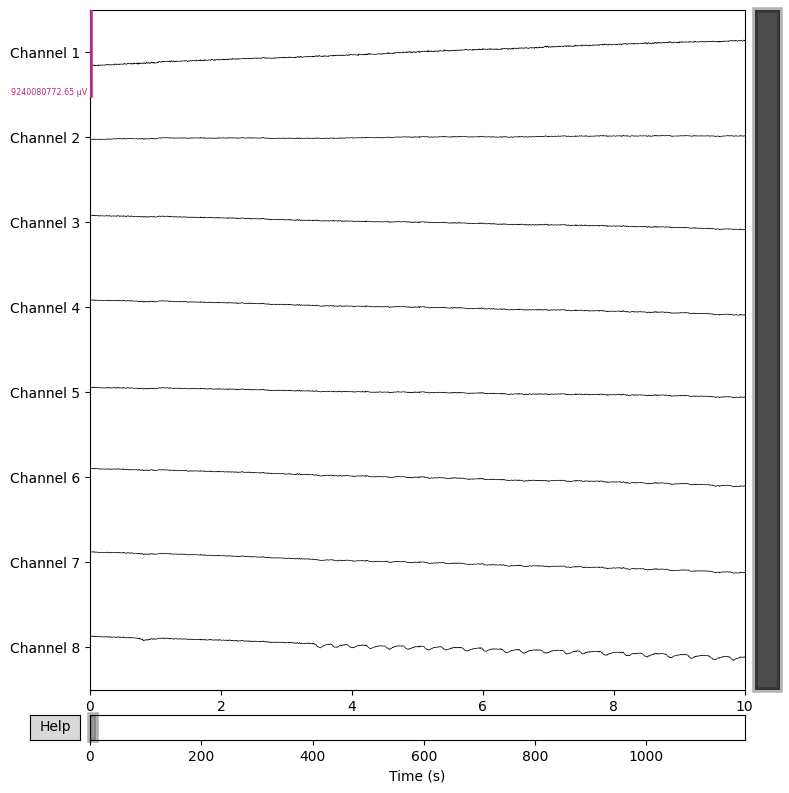

In [ ]:
ch_names = [raw.ch_names]
ch_names_to_keep = [ch_names[0][1:9]]
raw = raw.pick_channels(ch_names_to_keep[0])
# Now you can work with the MNE Raw object
print(raw.info)
print(raw.get_data())
raw.plot_psd()
raw.plot(scalings='auto')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)



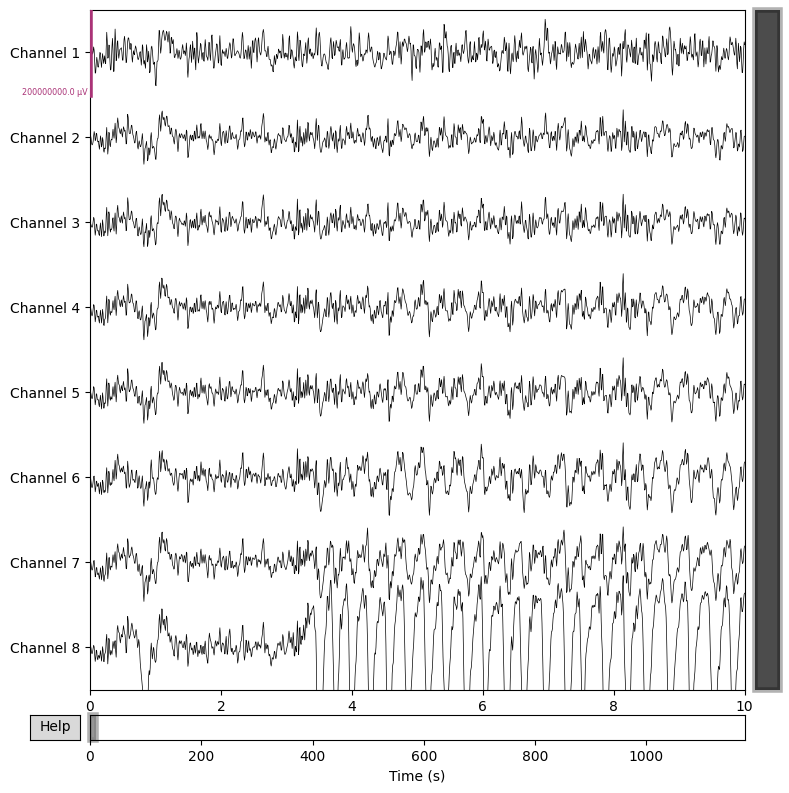

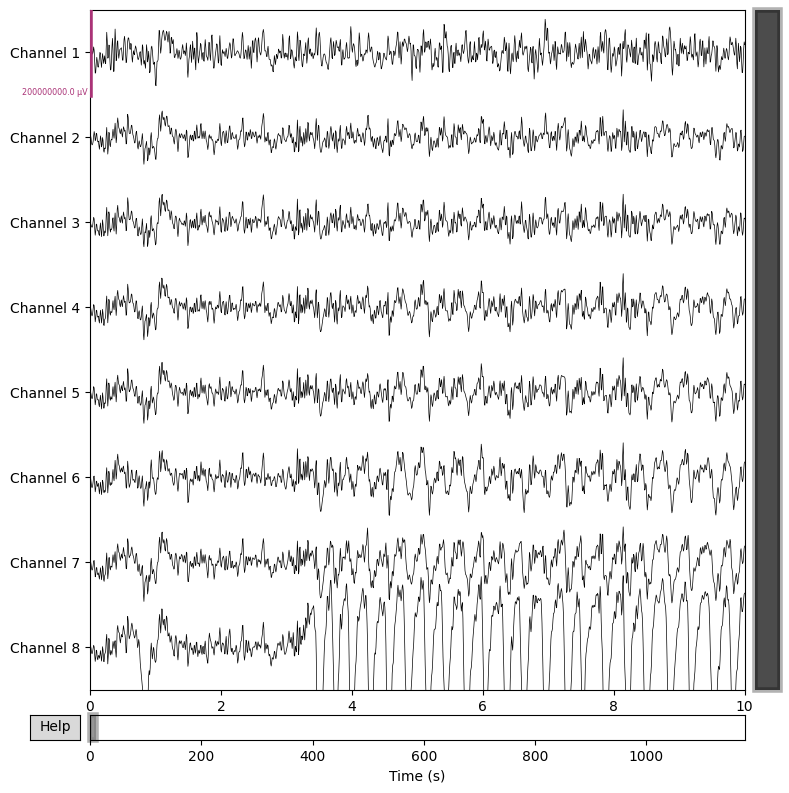

In [ ]:
# Time to start filtering
# 60hz electrical filter
#raw.notch_filter(60)

# Research said filter to alpha/beta waves
raw.filter(l_freq = 2, h_freq=30)
# Plotting the data with adjusted scaling
raw.plot(n_channels=len(ch_names_to_keep[0]), scalings={'eeg': 100}, title='BCI Data')

#raw.plot_psd()
#raw.plot(scalings='auto')

In [ ]:
path = "/content/OpenBCI-RAW-2024-02-21_20-35-53.txt"
df = pd.read_csv(path, delimiter = ',', skiprows=5)
data = df.to_numpy()

In [ ]:
sfreq = 250  # sample rate in Hz
#data = np.delete(data, [12, 13, 19, 20, 21, 23], axis=1) # IMPORTANT - CHANGE THIS FOR EVERY DATA READING
data = data[:, :-1] # removes timestamps
ch_names = ['Channel {}'.format(i) for i in range(data.shape[1])]
ch_types = ['eeg' for i in range(data.shape[1])]

In [ ]:
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(data.T, info)

Creating RawArray with float64 data, n_channels=24, n_times=359395
    Range : 0 ... 359394 =      0.000 ...  1437.576 secs
Ready.


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<Info | 7 non-empty values
 bads: []
 ch_names: Channel 1, Channel 2, Channel 3, Channel 4, Channel 5, Channel ...
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>
[[   1602.21774605    1601.45778673    1604.25175479 ...  -21803.43381207
   -21508.59195096  -21262.02985788]
 [   7809.47599524    7813.96869588    7813.85693715 ...  -25810.87807547
   -25516.84087716  -25270.01056314]
 [   1139.38017361    1160.50257212    1161.68721458 ...  -20034.36029367
   -19743.98878145  -19497.51609534]
 ...
 [  15261.83816932   15268.83426533   15269.39305894 ...  -31823.20676127
   -31531.04710949  -31284.90969955]
 [  18777.67816516   18786.3953455    18778.21460703 ... -156907.39088147
  -156281.25146404 -155647.17717733]
 [  32747.56315321   32753.79928992   32753.82164166 ...  -15592.666339
   -15303.63593145  -15054.838663

<ipython-input-58-e632e1ec1755>:7: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
<ipython-input-58-e632e1ec1755>:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


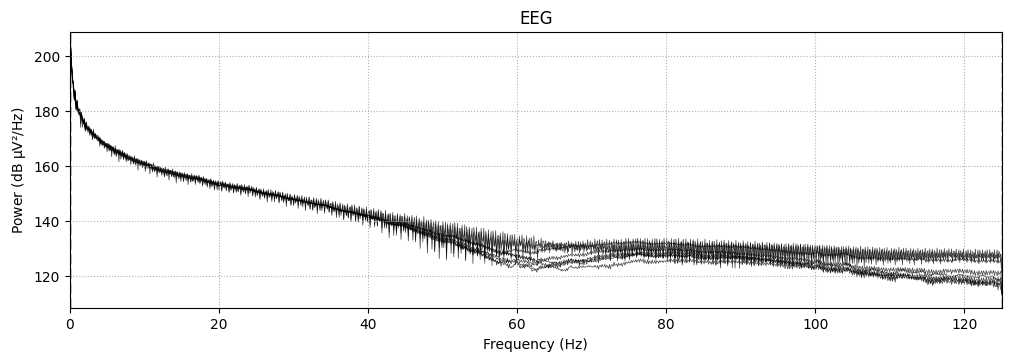

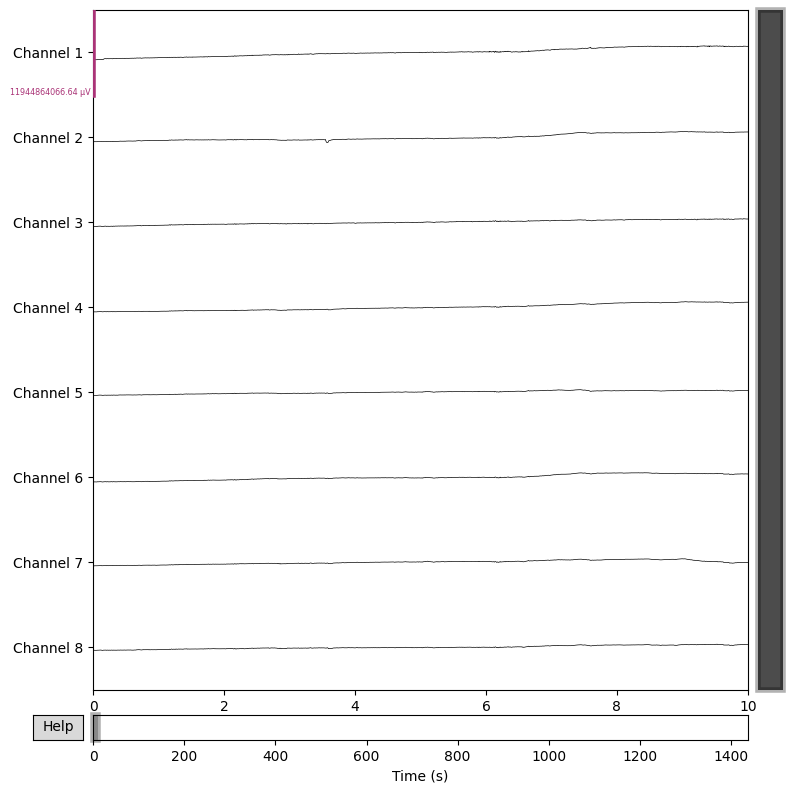

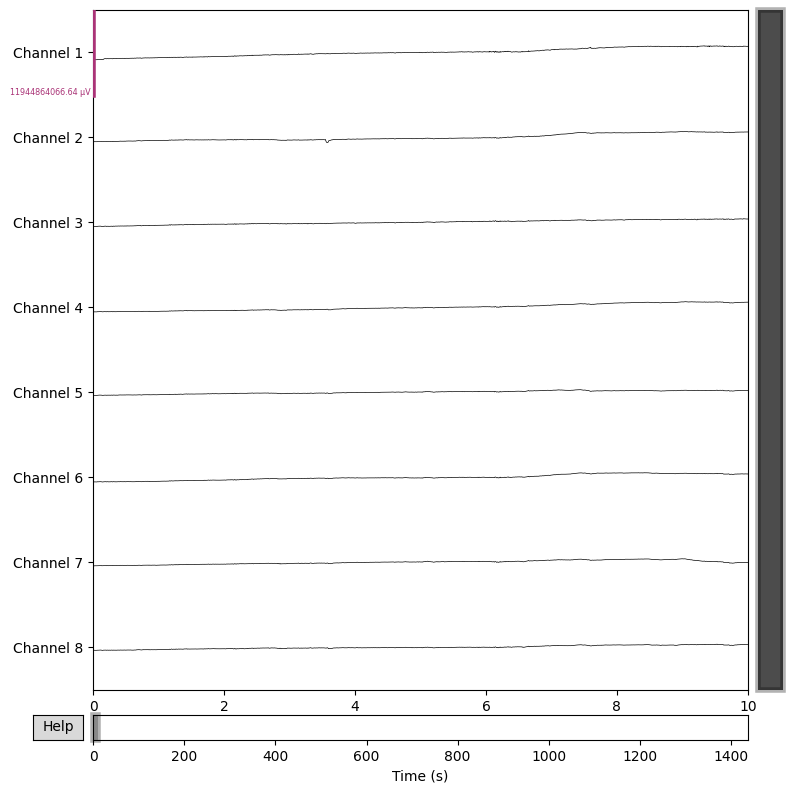

In [ ]:
ch_names = [raw.ch_names]
ch_names_to_keep = [ch_names[0][1:9]]
raw = raw.pick_channels(ch_names_to_keep[0])
# Now you can work with the MNE Raw object
print(raw.info)
print(raw.get_data())
raw.plot_psd()
raw.plot(scalings='auto')

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge

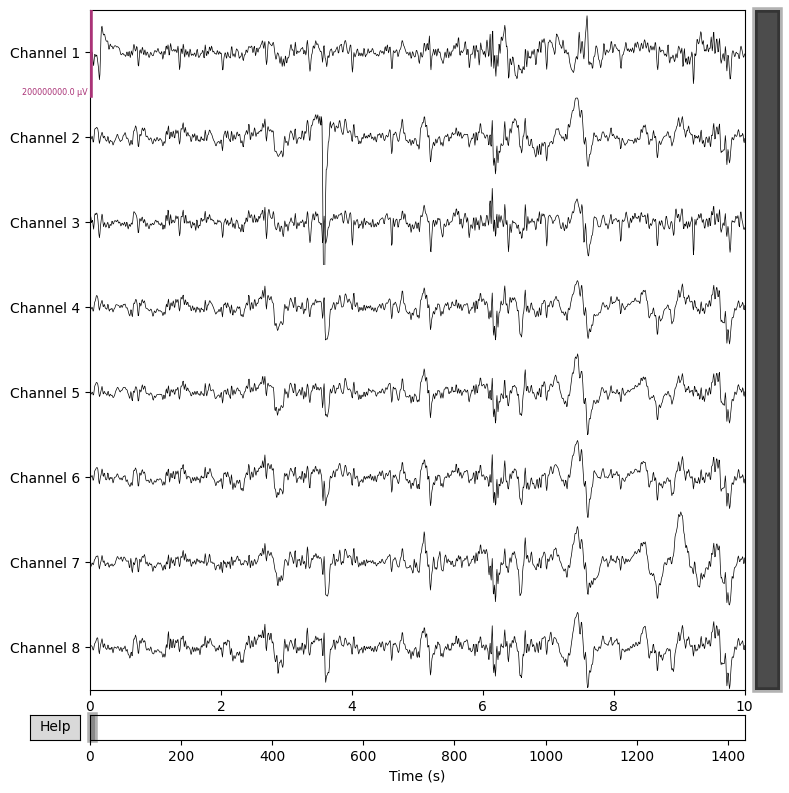

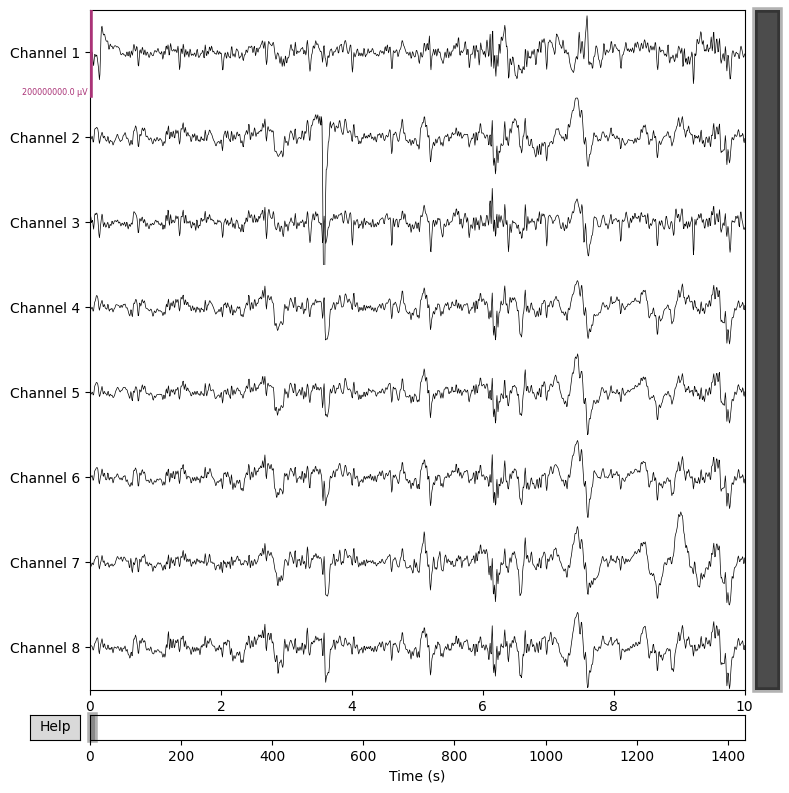

In [ ]:
# Time to start filtering
# 60hz electrical filter
raw.notch_filter(60)

# Research said filter to alpha/beta waves
raw.filter(l_freq=2, h_freq=30)

raw.plot(n_channels=len(ch_names_to_keep[0]), scalings={'eeg': 100}, title='BCI Data')

#raw.plot_psd()
#raw.plot(scalings='auto')

In [ ]:
filteredData = raw._data
num_samples = len(filteredData[0])
filteredData = np.append(filteredData, np.zeros([1, num_samples]), 0)



In [ ]:
import numpy as np

# Assuming sfreq and focus_time are defined
sfreq = 250  # sample rate in Hz

#2-15
focus_time_215 = [[0, 396], [406, 465], [479, 490], [505, 515], [524, 562], [570, 665]]
#2-21
focus_time_221 = [[44, 339], [345, 387], [398, 838], [871, 881], [886, 1161], [1217, 1227], [1248, 1347], [1349, 1427]]

# Choose the correct focus_time to use
focus_time = focus_time_221  # or focus_time_215 depending on your need

# Multiply intervals by sfreq
for interval in focus_time:
    interval[0] = interval[0] * sfreq
    interval[1] = interval[1] * sfreq

#USE THIS FOR 215
# for interval in focus_time:
#   for i in range(interval[0], interval[1]):
#     filteredData[8, i] = 1

# CUTS DOWN FILTERED DATA WHEN 221 IS RUN. IF ITS 2-15, DO IT TOO
filteredData = np.zeros((9, 359395))

# Apply the intervals
for interval in focus_time:
    start_idx = interval[0]
    end_idx = interval[1]
    # Ensure indices are within bounds
    if start_idx < filteredData.shape[1] and end_idx <= filteredData.shape[1]:
        for i in range(start_idx, end_idx):
            filteredData[8, i] = 1
    else:
        print(f"Interval {interval} is out of bounds for filteredData with shape {filteredData.shape}")

# For verification
print(filteredData)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
for i in range(99*sfreq, 111*sfreq):
  print(filteredData[8, i])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [ ]:
filteredData

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])